# Iris dataset

In [167]:

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import cross_validation
from sklearn import metrics 
from sklearn import linear_model


from pandas import DataFrame

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [168]:
iris = datasets.load_iris()
print iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [169]:
print iris.data[:10]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [170]:
print iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [171]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [172]:
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
print iris.target_names
iris_frame

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


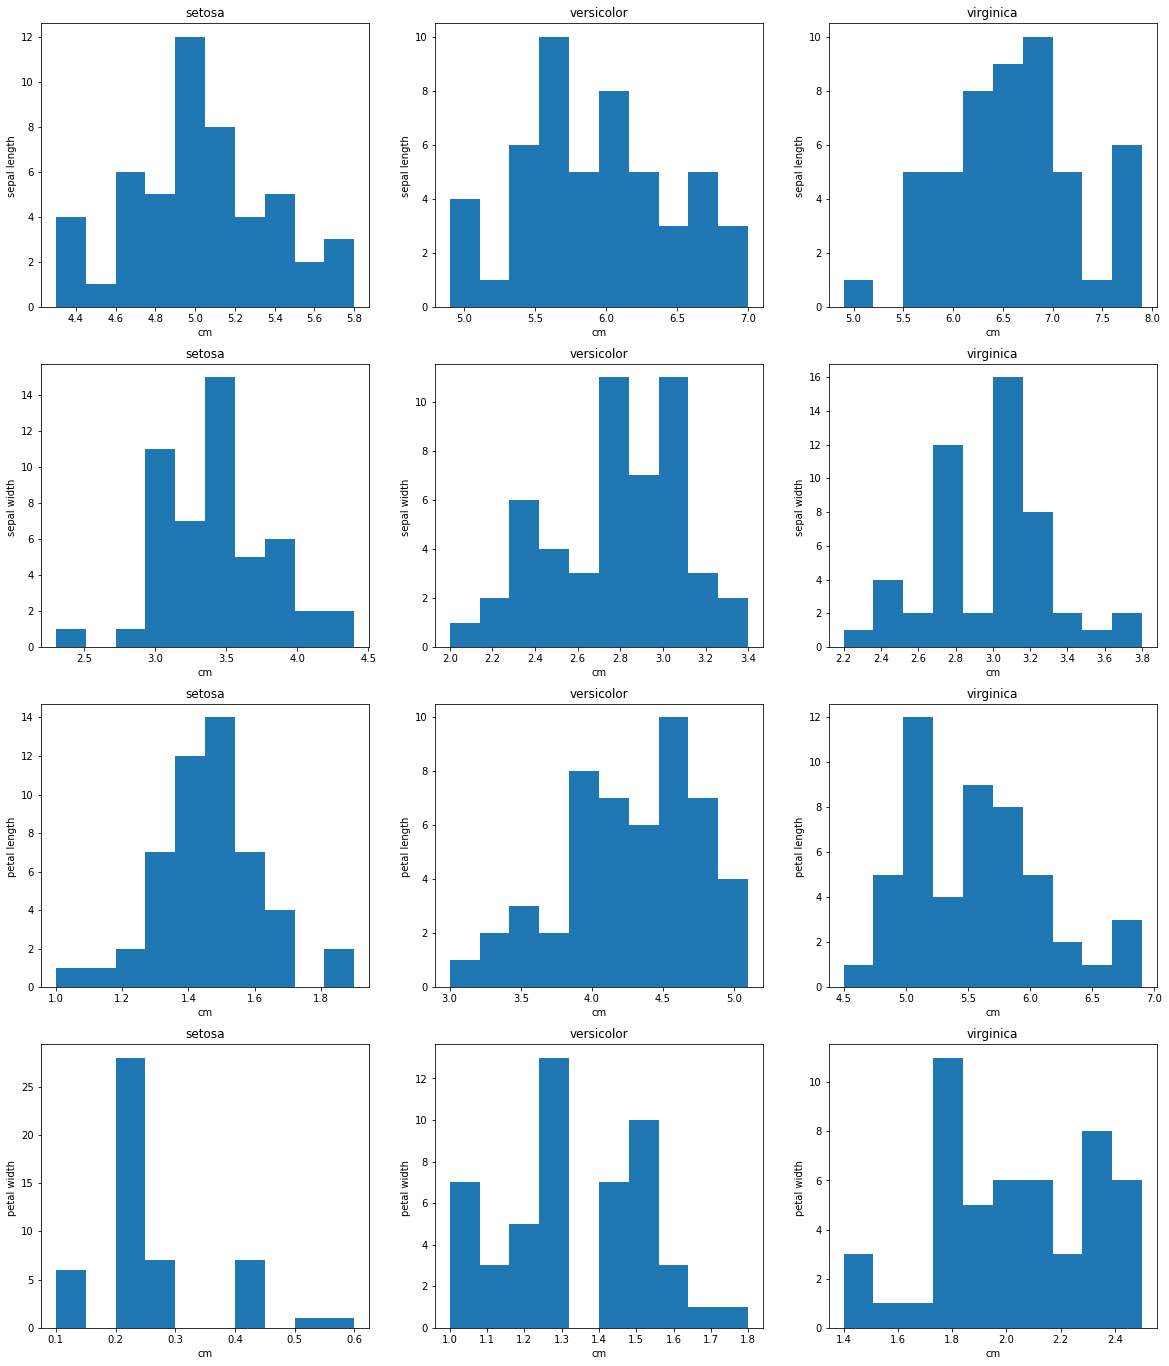

In [173]:
pyplot.figure(figsize(20, 24))

plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

# pairplot

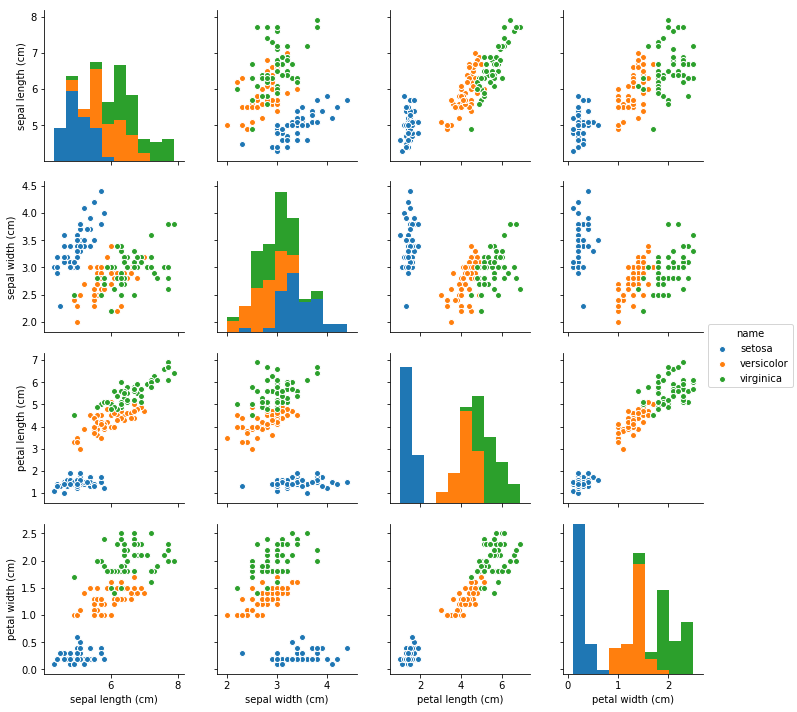

In [174]:
import seaborn as sns
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

# Descriptive Statistics 

In [175]:
#iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')
# накопительная сумма:
# print iris_frame['sepal length (cm)'].cumsum() 

# берем только setosa:
df = iris_frame['sepal length (cm)'][iris_frame['name'].str.contains("setosa")]

print df.sum()
print df.mean()
#Count the number of non-NA values
print df.count()
print df.min()
print df.max()
# медиана
print df.median()
# standard deviation 
print df.std()
# variance - ???
print df.var()
# Skewness - ???
print df.skew()
# Kurtosis - ???
print df.kurt()
# Correlation Matrix Of Values
# Не работает:
#df.corr(method='pearson', min_periods=1) 
# Не работает:
#df.cov(10)
print '------- describe ---------'
print df.describe()
print '------- describe end---------'

#print df

250.3
5.006
50
4.3
5.8
5.0
0.352489687213
0.124248979592
0.120086985995
-0.252688796224
------- describe ---------
count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal length (cm), dtype: float64
------- describe end---------


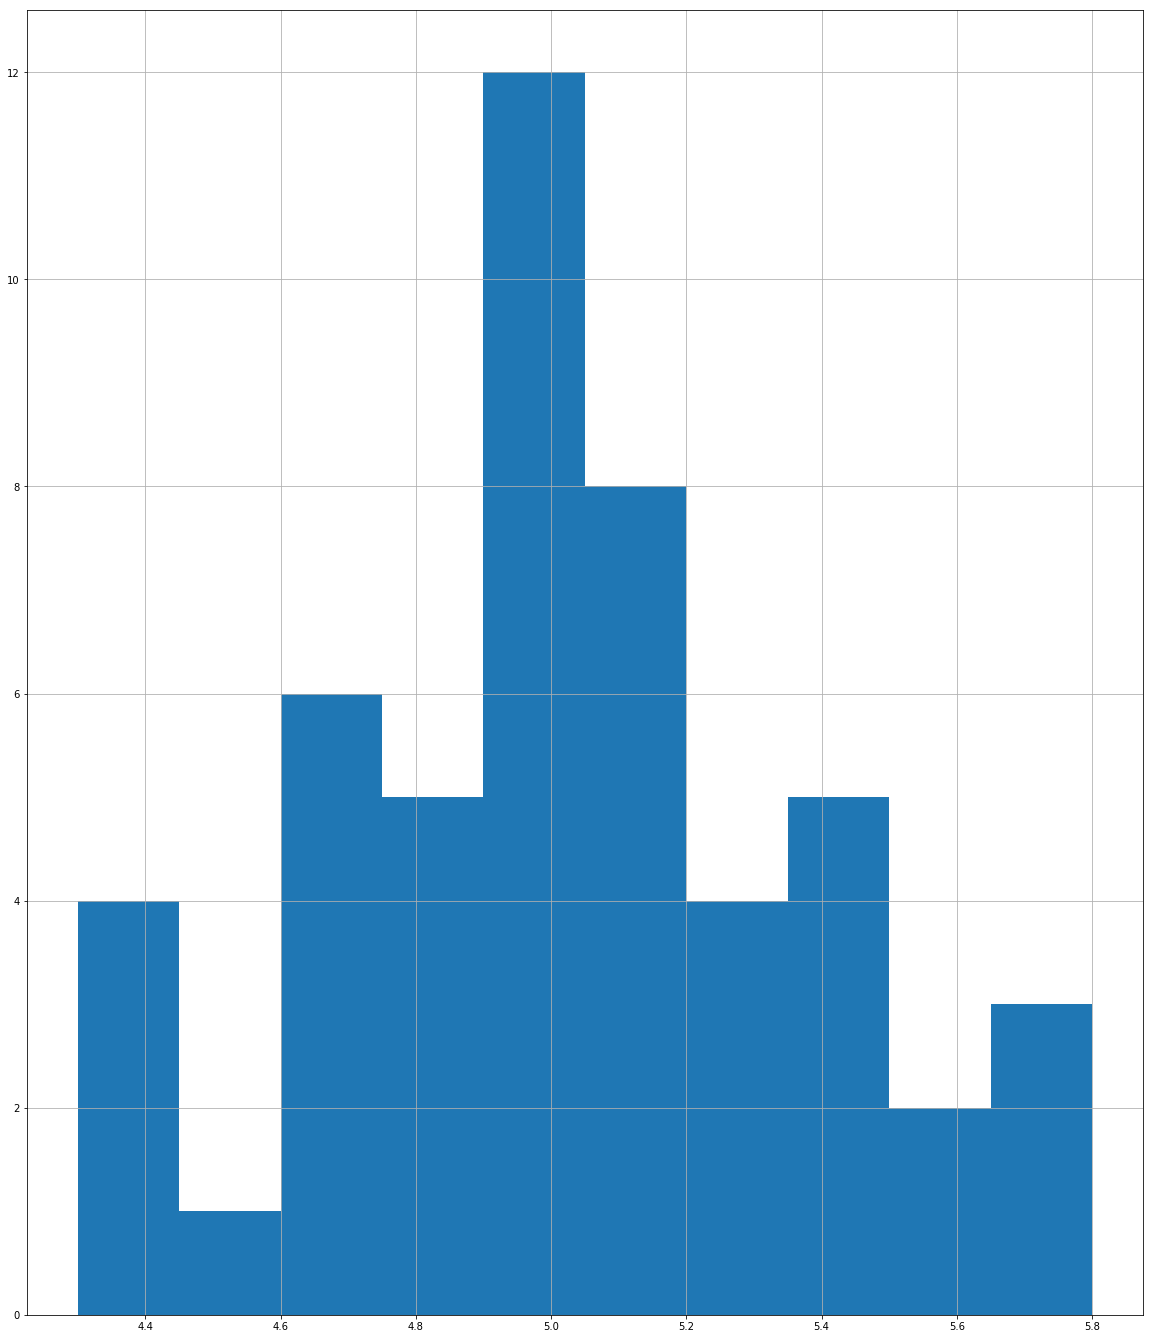

In [176]:
df.hist()

### Кластеризация K-Means

In [177]:

train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 1)

#print train_data[:20] 
#print test_data[:20] 
#print train_labels[:20] 
#print test_labels[:20] 

k = KMeans(n_clusters=3, random_state = 1)
k.fit(train_data)
k_predictions = k.predict(test_data)


print metrics.accuracy_score(test_labels, k_predictions)
print metrics.classification_report(test_labels, k_predictions)



#print labels[:20]
#print k.inertia_ 
#print k.cluster_centers_



0.222222222222
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        14
          1       0.00      0.00      0.00        18
          2       0.91      0.77      0.83        13

avg / total       0.26      0.22      0.24        45



[2 0 0 0 1 0 0 2 2 2]
[2 0 0 0 1 0 0 2 2 2]


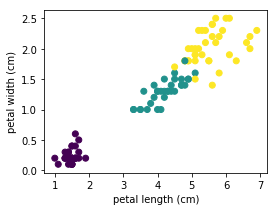

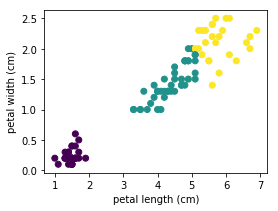

In [178]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X1 = train_data
y1 = train_labels

X2 = train_data
y2 = k.labels_

# метки нумеруем как в исходнике
y2[y2==0] = 15
y2[y2==1] = 0
y2[y2==15] = 1

print y1[:10]
print y2[:10]


labels2 = y1
fignum = 1
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X1[:, 2], X1[:, 3], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.show()

labels2 = y2
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X2[:, 2], X2[:, 3], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')

plt.show()

###  Классификация  - Stochastic Gradient Descent

In [222]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 1)

#print train_data[:20] 
#print test_data[:20] 
#print train_labels[:20] 
#print test_labels[:20] 

clf = linear_model.SGDClassifier(alpha=0.001, n_iter=100, random_state = 1)
clf.fit(train_data, train_labels)

clf_predictions = clf.predict(test_data)

print metrics.accuracy_score(test_labels, clf_predictions)
print metrics.classification_report(test_labels, clf_predictions)



0.844444444444
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      0.61      0.76        18
          2       0.65      1.00      0.79        13

avg / total       0.90      0.84      0.84        45



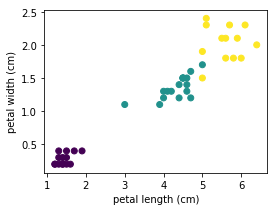

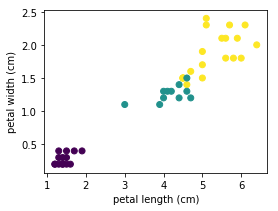

In [223]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X1 = test_data
y1 = test_labels

X2 = test_data
y2 = clf_predictions

labels2 = y1
fignum = 1
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X1[:, 2], X1[:, 3], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.show()

labels2 = y2
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X2[:, 2], X2[:, 3], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')

plt.show()

In [181]:
print X2[:, 0]
print X2[:, 1]
print X2[:, 2]
print X2[:, 3]

[ 5.8  5.1  6.6  5.4  7.9  6.3  6.9  5.1  4.7  6.9  5.6  5.4  7.1  6.4  6.
  4.4  5.8  5.6  5.4  5.   5.5  5.4  6.7  5.   7.2  5.7  5.5  5.1  6.1  6.3
  6.1  7.7  5.6  6.4  5.8  5.3  5.5  5.2  6.5  6.7  6.8  5.1  6.   6.3  6.6]
[ 4.   2.5  3.   3.9  3.8  3.3  3.1  3.8  3.2  3.2  2.7  3.9  3.   3.2  2.9
  3.2  2.6  3.   3.4  3.2  2.6  3.   3.   3.5  3.2  2.8  4.2  3.8  2.8  2.5
  3.   3.   2.5  2.8  2.8  3.7  2.3  3.4  2.8  2.5  3.   3.5  2.2  2.9  2.9]
[ 1.2  3.   4.4  1.3  6.4  4.7  5.1  1.9  1.6  5.7  4.2  1.7  5.9  4.5  4.5
  1.3  4.   4.5  1.5  1.2  4.4  4.5  5.   1.3  6.   4.1  1.4  1.5  4.7  5.
  4.6  6.1  3.9  5.6  5.1  1.5  4.   1.4  4.6  5.8  5.5  1.4  5.   5.6  4.6]
[ 0.2  1.1  1.4  0.4  2.   1.6  2.3  0.4  0.2  2.3  1.3  0.4  2.1  1.5  1.5
  0.2  1.2  1.5  0.4  0.2  1.2  1.5  1.7  0.3  1.8  1.3  0.2  0.3  1.2  1.9
  1.4  2.3  1.1  2.1  2.4  0.2  1.3  0.2  1.5  1.8  2.1  0.3  1.5  1.8  1.3]


## Линейная регрессия

(0.41575541635241148, -0.36307552131902887, 0.96286543140279612, 4.6750039073274959e-86, 0.0095824357907662444)


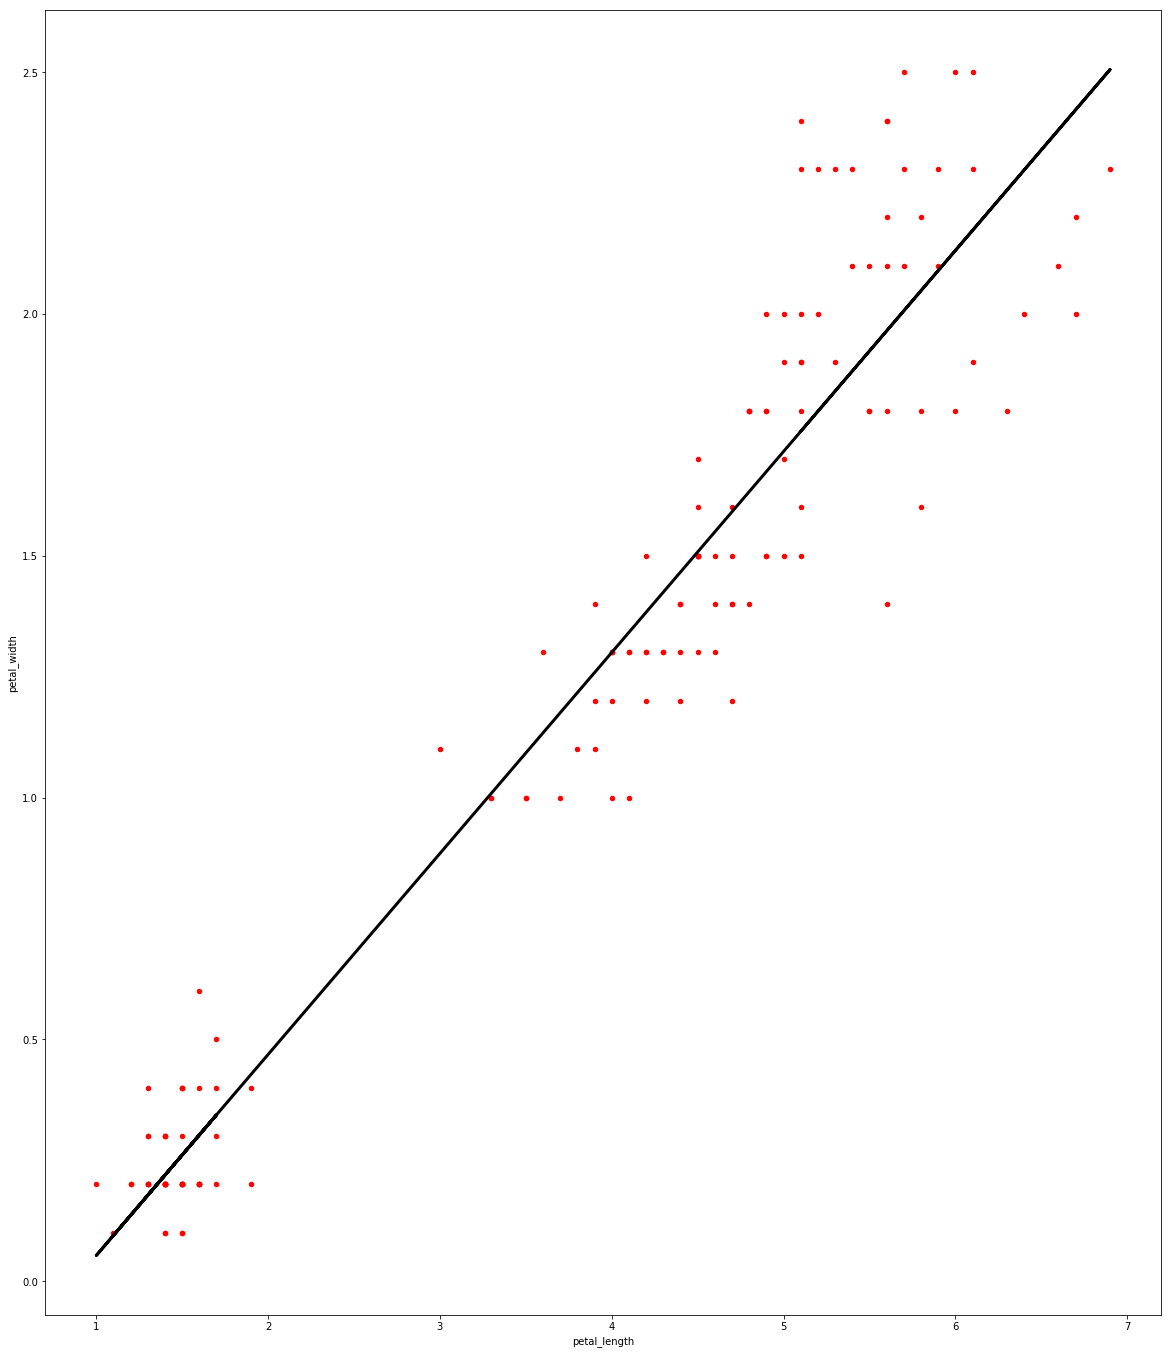

In [225]:
# load iris sample dataset
import seaborn.apionly as sns
iris_regr = sns.load_dataset('iris')
 
# import scipy
from scipy import polyval, stats
 
fit_output = stats.linregress(iris_regr["petal_length"], iris_regr["petal_width"])
slope, intercept, r_value, p_value, slope_std_error = fit_output
print(slope, intercept, r_value, p_value, slope_std_error) 

# use scipy polyval to create y-values from x_data and the linregress fit parameters
scipy_fitted_y_vals = polyval([slope,intercept],iris_regr["petal_length"]) 

import matplotlib.pyplot as plt
axes = iris_regr.plot(x="petal_length", y="petal_width", kind="scatter", color="red")
plt.plot(iris_regr["petal_length"], scipy_fitted_y_vals, color='black', linewidth=3)
plt.show()

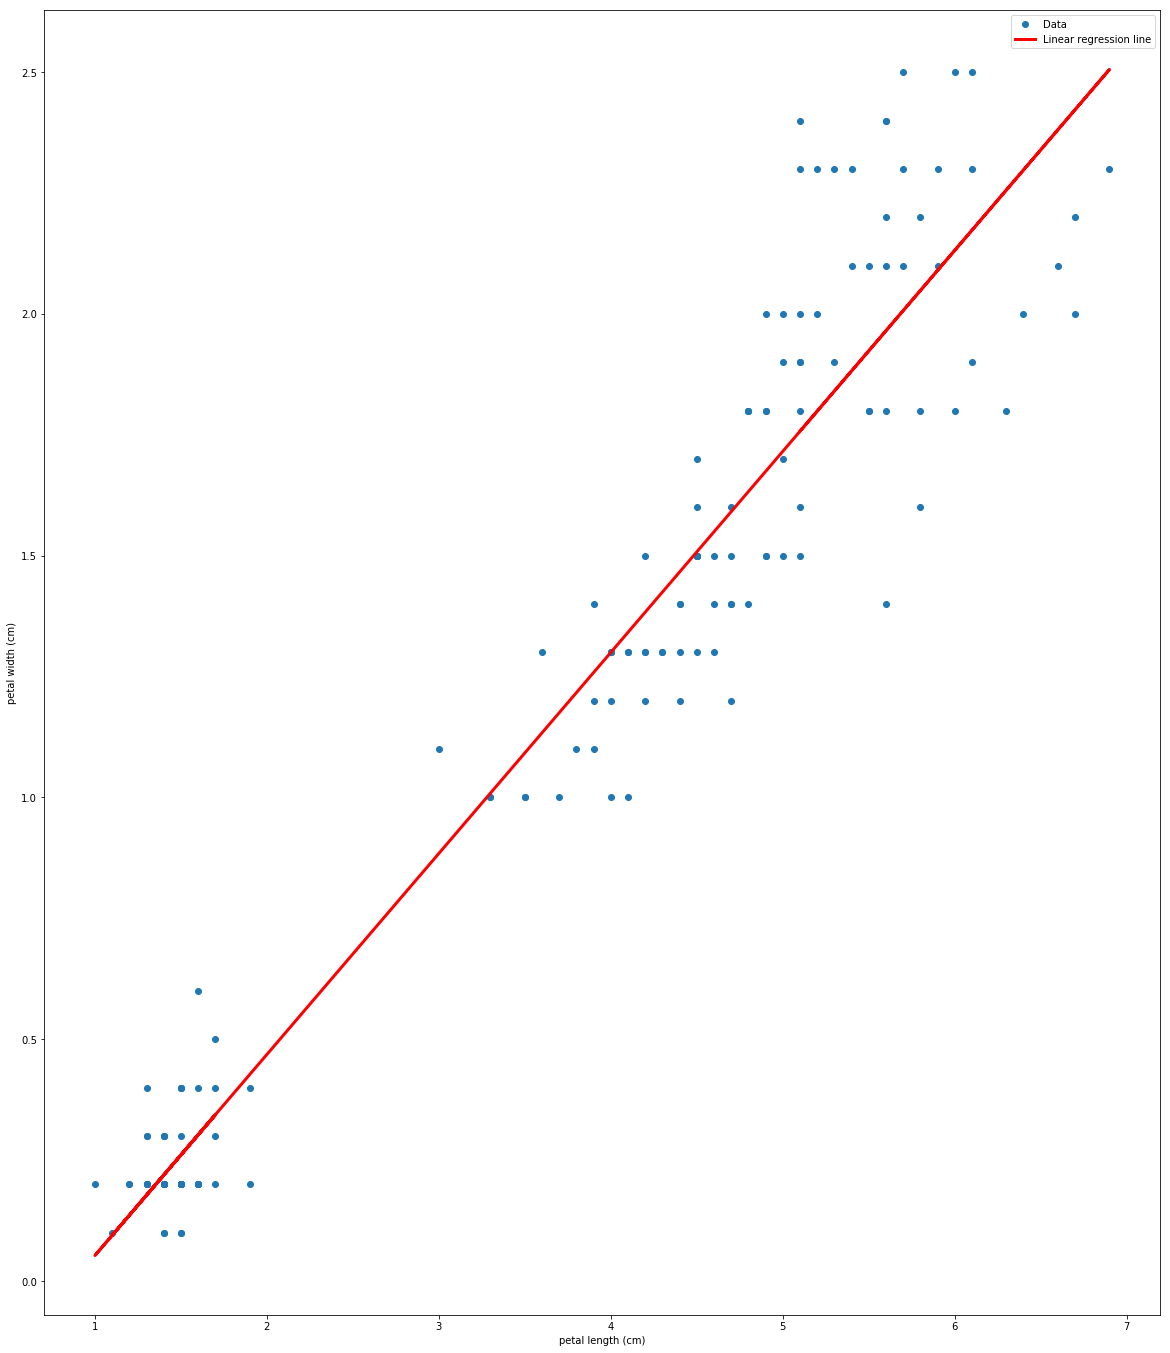

In [228]:
plt.plot(iris_regr["petal_length"], iris_regr["petal_width"],'o', label='Data')
plt.plot(iris_regr["petal_length"], intercept + slope*iris_regr["petal_length"], 'r', linewidth=3, label='Linear regression line')
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.legend()
plt.show()

# нормализуем переменные

In [244]:
from sklearn import preprocessing

norm = preprocessing.normalize(iris_frame['sepal length (cm)'])
iris_frame['sepal length (cm) norm'] = norm[0]

norm = preprocessing.normalize(iris_frame['sepal width (cm)'])
iris_frame['sepal width (cm) norm'] = norm[0]

norm = preprocessing.normalize(iris_frame['petal length (cm)'])
iris_frame['petal length (cm) norm'] = norm[0]

norm = preprocessing.normalize(iris_frame['petal width (cm)'])
iris_frame['petal width (cm) norm'] = norm[0]

print iris_frame[:5]

            

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target    name  sepal length (cm) norm  sepal width (cm) norm  \
0       0  setosa                0.070563               0.092651   
1       0  setosa                0.067795               0.079415   
2       0  setosa                0.065028               0.084709   
3       0  setosa                0.063645               0.082062   
4       0  setosa                0.069179               0.095298   

   petal length (cm) norm  petal width (cm) norm  
0                0.027546               0.011503  
1             

/media/alex/1286BD9C86BD80B1/Anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/media/alex/1286BD9C86BD80B1/Anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/media/alex/1286BD9C86BD80B1/Anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature 

In [319]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['sepal length (cm) norm','sepal width (cm) norm','petal length (cm) norm','petal width (cm) norm']], iris_frame['target'], test_size = 0.3)
#train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3, random_state = 1)

#print train_data
#print test_data
#print train_labels
#print test_labels 

clf = linear_model.SGDClassifier(alpha=0.001, n_iter=100)
clf.fit(train_data, train_labels)

clf_predictions = clf.predict(test_data)

print clf_predictions

print metrics.accuracy_score(test_labels, clf_predictions)
print metrics.classification_report(test_labels, clf_predictions)

[1 0 2 2 0 0 0 2 2 2 0 0 0 0 0 2 0 2 2 0 0 2 0 2 2 1 2 2 0 2 1 0 0 0 0 0 2
 2 0 0 0 2 2 0 2]
0.822222222222
             precision    recall  f1-score   support

          0       0.78      1.00      0.88        18
          1       1.00      0.27      0.43        11
          2       0.84      1.00      0.91        16

avg / total       0.86      0.82      0.78        45



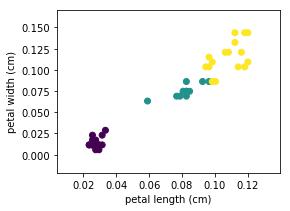

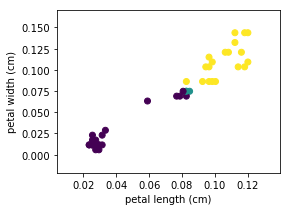

In [320]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X1 = test_data
y1 = test_labels

X2 = test_data
y2 = clf_predictions


labels2 = y1
fignum = 1
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X1['petal length (cm) norm'], X1['petal width (cm) norm'], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.show()

labels2 = y2
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X1['petal length (cm) norm'], X1['petal width (cm) norm'], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')

plt.show()

## убираем переменные

In [387]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3, random_state = 1)

#print train_data
#print test_data[:2] 
#print train_labels
#print test_labels[:2] 

clf = linear_model.SGDClassifier(alpha=0.001, n_iter=100)
clf.fit(train_data, train_labels)

clf_predictions = clf.predict(test_data)

print metrics.accuracy_score(test_labels, clf_predictions)
print metrics.classification_report(test_labels, clf_predictions)


0.911111111111
             precision    recall  f1-score   support

          0       0.93      1.00      0.97        14
          1       1.00      0.78      0.88        18
          2       0.81      1.00      0.90        13

avg / total       0.93      0.91      0.91        45



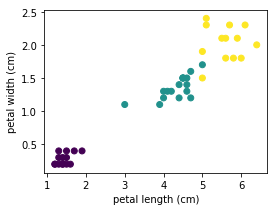

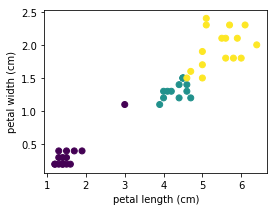

In [327]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X1 = test_data
y1 = test_labels

X2 = test_data
y2 = clf_predictions

X1['petal length (cm)']

labels2 = y1
fignum = 1
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X1['petal length (cm)'], X1['petal width (cm)'], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.show()

labels2 = y2
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X1['petal length (cm)'], X1['petal width (cm)'], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')

plt.show()

## делаем новую переменную - площадь

In [348]:
iris_frame['petal_area'] = 0.0

for k in range(0,150):
    iris_frame['petal_area'][k] = iris_frame['petal length (cm)'][k] * iris_frame['petal width (cm)'][k]
    #print iris_frame['petal_area'][k]
    
print iris_frame[:10]

/media/alex/1286BD9C86BD80B1/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target    name  sepal length (cm) norm  sepal width (cm) norm  \
0       0  setosa                0.070563               0.0926

In [358]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['petal_area','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)

#print train_data
#print test_data[:2] 
#print train_labels
#print test_labels[:2] 

clf = linear_model.SGDClassifier(alpha=0.001, n_iter=100)
clf.fit(train_data[['petal_area']], train_labels)

clf_predictions = clf.predict(test_data[['petal_area']])

print metrics.accuracy_score(test_labels, clf_predictions)
print metrics.classification_report(test_labels, clf_predictions)

0.911111111111
             precision    recall  f1-score   support

          0       0.88      1.00      0.93        14
          1       1.00      0.78      0.88        18
          2       0.87      1.00      0.93        13

avg / total       0.92      0.91      0.91        45



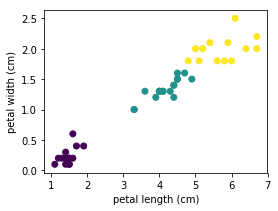

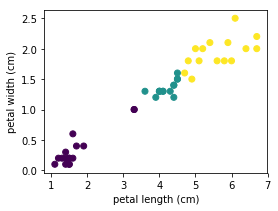

In [359]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X1 = test_data
y1 = test_labels

X2 = test_data
y2 = clf_predictions


labels2 = y1
fignum = 1
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X1['petal length (cm)'], X1['petal width (cm)'], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.show()

labels2 = y2
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X1['petal length (cm)'], X1['petal width (cm)'], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')

plt.show()

## Подбор оптимальных параметров алгоритма

In [392]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001])
# create and fit a ridge regression model, testing each alpha
model = linear_model.SGDClassifier()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'])
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+00,   1.00000e-01,   1.00000e-02,   1.00000e-03,
         1.00000e-04])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.76
0.1
